##Library

In [44]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

##Load Data

Memuat dataset yang akan digunakan untuk melakukan clustering. pada dataset berikut masih terdapat nilai null.

In [45]:
df_trainKendaraan = pd.read_csv("kendaraan_train.csv") 
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


##Cleansing Data

Jika dilihat dari jumlah data yang memiliki nilai null maka nilai null < 50%, maka harus melakukan cleansing data setiap kolomnya.

In [46]:
df_trainKendaraan.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

================================================================================

Cleansing data pada kolom **Jenis Kelamin**

================================================================================

In [47]:
df_trainKendaraan['Jenis_Kelamin'].value_counts()

Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64

In [48]:
df_trainKendaraan['Jenis_Kelamin'] = df_trainKendaraan['Jenis_Kelamin'].fillna('Pria')

================================================================================

Cleansing data pada kolom **Umur**

In [49]:
df_trainKendaraan['Umur'].value_counts()

24.0    18443
23.0    17403
22.0    14975
25.0    14634
21.0    11652
        ...  
81.0       42
82.0       20
83.0       16
84.0        9
85.0        8
Name: Umur, Length: 66, dtype: int64

In [50]:
df_trainKendaraan['Umur'] = df_trainKendaraan['Umur'].fillna(df_trainKendaraan['Umur'].mean())
df_trainKendaraan['Umur'] = df_trainKendaraan['Umur'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


================================================================================

Cleansing data pada kolom **SIM**

In [51]:
df_trainKendaraan['SIM'] = df_trainKendaraan['SIM'].fillna(df_trainKendaraan['SIM'].mean())
df_trainKendaraan['SIM'] = df_trainKendaraan['SIM'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Cleansing data pada kolom **Kode Daerah**

In [52]:
df_trainKendaraan['Kode_Daerah'].value_counts().head()

28.0    75439
8.0     24186
46.0    14157
41.0    12931
15.0     9500
Name: Kode_Daerah, dtype: int64

In [53]:
df_trainKendaraan['Kode_Daerah'] = df_trainKendaraan['Kode_Daerah'].fillna(28.0)
df_trainKendaraan['Kode_Daerah'] = df_trainKendaraan['Kode_Daerah'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1,39,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1,46,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1,48,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1,35,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


================================================================================

Cleansing data pada kolom **Sudah Asuransi**

In [54]:
df_trainKendaraan['Sudah_Asuransi'].value_counts()

0.0    146997
1.0    124605
Name: Sudah_Asuransi, dtype: int64

In [55]:
df_trainKendaraan['Sudah_Asuransi'] = df_trainKendaraan['Sudah_Asuransi'].fillna(0.0)
df_trainKendaraan['Sudah_Asuransi'] = df_trainKendaraan['Sudah_Asuransi'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1,35,0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


================================================================================

Cleansing data pada kolom **Umur Kendaraan**

In [56]:
df_trainKendaraan['Umur_Kendaraan'].value_counts()

1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64

In [57]:
df_trainKendaraan['Umur_Kendaraan'] = df_trainKendaraan['Umur_Kendaraan'].fillna('1-2 Tahun')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1,35,0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


================================================================================

Cleansing data pada kolom **Kendaraan Rusak**

In [58]:
df_trainKendaraan['Kendaraan_Rusak'].value_counts()

Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64

In [59]:
df_trainKendaraan['Kendaraan_Rusak'] = df_trainKendaraan['Kendaraan_Rusak'].fillna('Pernah')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50,1,35,0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


================================================================================

Cleansing data pada kolom **Premi**

In [60]:
df_trainKendaraan['Premi'] = df_trainKendaraan['Premi'].fillna(df_trainKendaraan['Premi'].mean())
df_trainKendaraan['Premi'] = df_trainKendaraan['Premi'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152.0,97.0,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29.0,158.0,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733,160.0,119.0,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124.0,63.0,0
4,5,Pria,50,1,35,0,> 2 Tahun,Pernah,34857,88.0,194.0,0


================================================================================

Cleansing data pada kolom **Kanal Penjualan**

In [61]:
df_trainKendaraan['Kanal_Penjualan'].value_counts()

152.0    96090
26.0     56816
124.0    52756
160.0    15436
156.0     7542
         ...  
70.0         1
79.0         1
144.0        1
33.0         1
84.0         1
Name: Kanal_Penjualan, Length: 151, dtype: int64

In [62]:
df_trainKendaraan['Kanal_Penjualan'] = df_trainKendaraan['Kanal_Penjualan'].fillna(152.0)
df_trainKendaraan['Kanal_Penjualan'] = df_trainKendaraan['Kanal_Penjualan'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152,97.0,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29,158.0,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733,160,119.0,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124,63.0,0
4,5,Pria,50,1,35,0,> 2 Tahun,Pernah,34857,88,194.0,0


================================================================================

Cleansing data pada kolom **Lama Berlangganan**

In [63]:
# Lama Berlangganan
df_trainKendaraan['Lama_Berlangganan'] = df_trainKendaraan['Lama_Berlangganan'].fillna(df_trainKendaraan['Lama_Berlangganan'].mean())
df_trainKendaraan['Lama_Berlangganan'] = df_trainKendaraan['Lama_Berlangganan'].astype('int64')
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733,160,119,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
4,5,Pria,50,1,35,0,> 2 Tahun,Pernah,34857,88,194,0


================================================================================

Memastikan bahwa nilai null sudah tidak ada

In [64]:
# Check Null
df_trainKendaraan.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

##Encode

Mengubah data **jenis kelamin** yang memiliki sifat kategorikal dengan menggunakan **0 dan 1**

In [65]:
gender = {
    'Wanita': 0,
    'Pria': 1
}

df_trainKendaraan['Jenis_Kelamin'] = df_trainKendaraan['Jenis_Kelamin'].replace(gender)
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,2,1,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
2,3,1,21,1,46,1,< 1 Tahun,Tidak,32733,160,119,0
3,4,0,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
4,5,1,50,1,35,0,> 2 Tahun,Pernah,34857,88,194,0


Mengubah **data Umur** Kendaraan yang memiliki sifat kategorikal dengan menggunakan **0, 1, dan 2**

In [66]:
ageKendaraan = {
    '1-2 Tahun': 0,
    '< 1 Tahun': 1,
    '> 2 Tahun': 2
}

df_trainKendaraan['Umur_Kendaraan'] = df_trainKendaraan['Umur_Kendaraan'].replace(ageKendaraan)
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30,1,33,1,1,Tidak,28029,152,97,0
1,2,1,48,1,39,0,2,Pernah,25800,29,158,0
2,3,1,21,1,46,1,1,Tidak,32733,160,119,0
3,4,0,58,1,48,0,0,Tidak,2630,124,63,0
4,5,1,50,1,35,0,2,Pernah,34857,88,194,0


Mengubah data **Kendaraan Rusak** yang memiliki sifat kategorikal dengan menggunakan 0 dan 1

In [67]:
rusak = {
    'Pernah': 0,
    'Tidak': 1
}

df_trainKendaraan['Kendaraan_Rusak'] = df_trainKendaraan['Kendaraan_Rusak'].replace(rusak)
df_trainKendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30,1,33,1,1,1,28029,152,97,0
1,2,1,48,1,39,0,2,0,25800,29,158,0
2,3,1,21,1,46,1,1,1,32733,160,119,0
3,4,0,58,1,48,0,0,1,2630,124,63,0
4,5,1,50,1,35,0,2,0,34857,88,194,0


Menganti index dengan **Id**

In [68]:
df_trainKendaraan.set_index('id', inplace=True)
df_trainKendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,,,,,,,,,,,
1,0,30,1,33,1,1,1,28029,152,97,0
2,1,48,1,39,0,2,0,25800,29,158,0
3,1,21,1,46,1,1,1,32733,160,119,0
4,0,58,1,48,0,0,1,2630,124,63,0
5,1,50,1,35,0,2,0,34857,88,194,0


In [69]:
df_trainKendaraan = df_trainKendaraan.astype('float64')
df_trainKendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,,,,,,,,,,,
1,0.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0,0.0
2,1.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0,0.0
3,1.0,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0,0.0
4,0.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0,0.0
5,1.0,50.0,1.0,35.0,0.0,2.0,0.0,34857.0,88.0,194.0,0.0


##Normalisasi

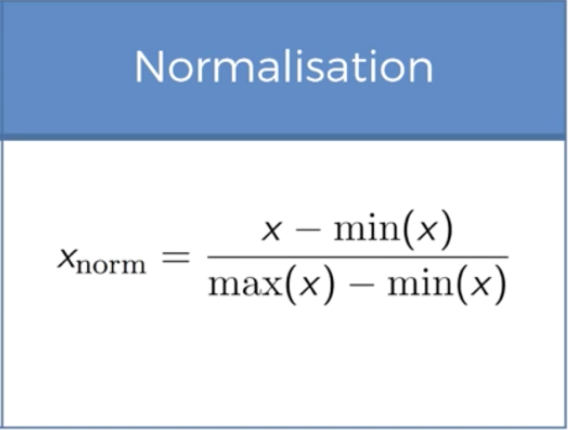

In [70]:
def normal(x):
  return (x - x.min()) / (x.max() - x.min())

In [71]:
col = list(df_trainKendaraan.columns)
for i in range(len(col)):
  df_trainKendaraan[[col[i]]] = df_trainKendaraan[[col[i]]].apply(normal)

In [72]:
df_trainKendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,,,,,,,,,,,
1,0.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038,0.0
2,1.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0
3,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.056002,0.981481,0.377163,0.0
4,0.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0
5,1.0,0.461538,1.0,0.673077,0.0,1.0,0.0,0.059953,0.537037,0.636678,0.0


##Korelasi

Mengambil kolom yang akan diuji dengan menggunakan korelasi

In [73]:
df_trainKendaraan.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,0.135912,-0.004068,0.001435,-0.074485,-0.105474,-0.082619,0.004290,-0.105351,-0.001272,0.051317
Umur,0.135912,1.000000,-0.016713,0.041482,-0.237184,-0.486780,-0.249311,0.061259,-0.541339,0.000138,0.107150
SIM,-0.004068,-0.016713,1.000000,-0.003120,0.002559,0.009463,0.002760,-0.002463,0.010656,-0.000499,0.002087
Kode_Daerah,0.001435,0.041482,-0.003120,1.000000,-0.022552,-0.026043,-0.026271,-0.011145,-0.040780,-0.003542,0.009897
Sudah_Asuransi,-0.074485,-0.237184,0.002559,-0.022552,1.000000,0.158225,0.749782,0.005276,0.203413,0.002666,-0.326014
Umur_Kendaraan,-0.105474,-0.486780,0.009463,-0.026043,0.158225,1.000000,0.158624,0.022568,0.358650,0.001878,-0.098415
Kendaraan_Rusak,-0.082619,-0.249311,0.002760,-0.026271,0.749782,0.158624,1.000000,-0.007769,0.207298,0.001248,-0.337919
Premi,0.004290,0.061259,-0.002463,-0.011145,0.005276,0.022568,-0.007769,1.000000,-0.105030,-0.000711,0.023136
Kanal_Penjualan,-0.105351,-0.541339,0.010656,-0.040780,0.203413,0.358650,0.207298,-0.105030,1.000000,-0.000182,-0.135812
Lama_Berlangganan,-0.001272,0.000138,-0.000499,-0.003542,0.002666,0.001878,0.001248,-0.000711,-0.000182,1.000000,-0.002170


In [74]:
df_trainKendaraan = df_trainKendaraan[:3000]

menggunakan kolom **Umur Kendaraan** dan **Kanal Penjualan** karena memiliki korelasi yang cukup tinggi dibandingkan yang lainnya yaitu 0.358650

In [75]:
df_test = df_trainKendaraan[['Umur_Kendaraan', 'Kanal_Penjualan']]
df_test.head()

,Umur_Kendaraan,Kanal_Penjualan
id,,
1,0.5,0.932099
2,1.0,0.172840
3,0.5,0.981481
4,0.0,0.759259
5,1.0,0.537037


##Centroid

Pemilihan Centroid awal

In [76]:
def centroidPick(df_train, k):
  centroids = np.zeros((k, df_train.shape[1]))
  for i in range(k):
    centroid = df_train.loc[np.random.choice(range(df_train.shape[0]))]
    centroids[i] = centroid

  return centroids

In [77]:
x = centroidPick(df_test, 3)
x

array([[0.        , 0.75925926],
       [0.        , 0.75925926],
       [0.        , 0.15432099]])

##Menentukan Jarak (Euclidean)

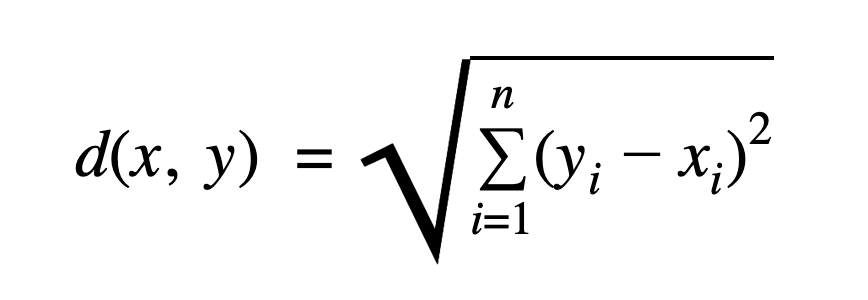

Menghitung jarak dan memberikan index data cluster berdasarkan nilai jarak minimum

In [78]:
def distance(centroids, df_jarak):
  centro = []
  for c in centroids:
    sum = 0
    for i in range(len(df_jarak) - 1):
      sum = sum + (c[i] - df_jarak[i]) ** 2

    centro.append(np.sqrt(sum))
  
  return centro.index(np.min(centro))

##K-Means

In [79]:
def kMeans(df, k):
  df_cluster = df.copy()
  centroids = centroidPick(df, k)
  centroidBool = True
  
  while centroidBool: 
    for idx, row in df_cluster.iterrows():
      df_cluster.loc[idx, 'Cluster'] = distance(centroids, df_cluster.loc[idx])

    centroidsNew = df_cluster.groupby('Cluster').mean().to_numpy()


    if np.array_equal(centroids,centroidsNew): 
      centroidBool = False

    centroids = centroidsNew

  return centroids, df_cluster

In [80]:
cent, df_clus = kMeans(df_test, 2)
df_clus.to_csv('output.csv')

##Elbow

In [81]:
# Within Cluster Sum of Square
def wSumSquare(df, cen):
  sum = 0
  for i in range(len(cen)):
    for idx, row in df.iterrows():
      if df.loc[idx, 'Cluster'] == i:
        for col in range(len(row) - 1):
          sum = sum + (cen[i][col] - df.loc[idx][col]) ** 2

  return sum

In [82]:
hasil = []
nilai_sse = []
for k in range(1, 8):
  cen, df_cluster = kMeans(df_test, k)
  hasil.append([cen, df_cluster])
  score = wSumSquare(df_cluster,cen)
  nilai_sse.append(score)
  print('cluster', k, ' = ', score)
  print('')

cluster 1  =  560.9701232281649

cluster 2  =  240.04068740764822

cluster 3  =  240.04068740764822

cluster 4  =  176.83520206662368

cluster 5  =  222.6195676460426

cluster 6  =  34.569373926183964

cluster 7  =  24.5245824007238



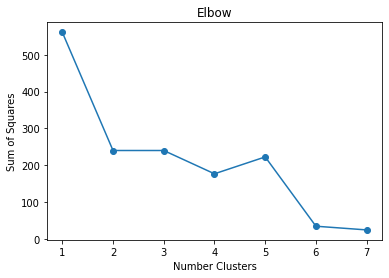

In [83]:
k_array = np.arange(1,8)
plt.plot(k_array,nilai_sse,marker='o')

plt.title('Elbow')

plt.xlabel('Number Clusters')
plt.ylabel('Sum of Squares')

plt.show()

##Visualisasi Data

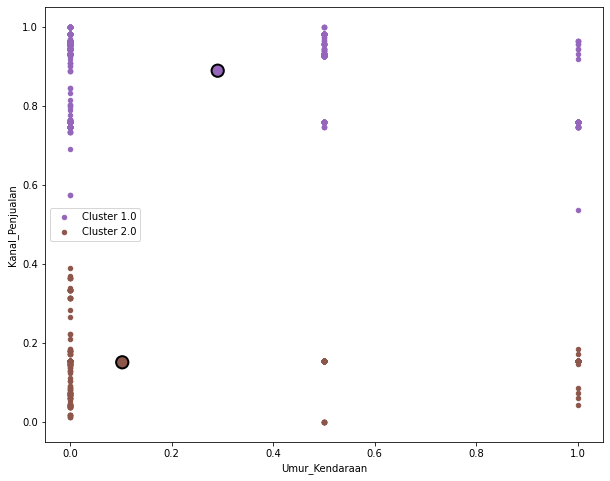

In [84]:
optimal_k = 2
colors = rd.sample(list(mcolors.TABLEAU_COLORS), optimal_k)
colors_list = []

for i  in range(optimal_k):
  colors_list.append([i,colors[i]])

colors = dict(colors_list)


optimal_k = hasil[optimal_k - 1]
centro_x = []
centro_y = []
for cent in optimal_k[0]:
  centro_x.append(cent[0])
  centro_y.append(cent[1])

fig, ax = plt.subplots()

grouped = optimal_k[1].groupby('Cluster')
for key, group in grouped:
  group.plot(ax=ax,
             kind='scatter',
             x='Umur_Kendaraan',
             y='Kanal_Penjualan',
             label='Cluster '+str(key+1),
             color=colors[key],
             figsize=(10,8))
  
ax.scatter(centro_x,
           centro_y,
           c=colors.values(),
           marker='o',
           s=150,
           edgecolors='black',
           linewidths=2)

plt.show()